# using logistic regression to classify 

- when the data is highly imbalanced 


## my toolkit 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import RobustScaler

## get data 

In [2]:
df=pd.read_csv('strokes_data.csv')

## initial EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


## initial cleaning steps 

- deal with nulls 
- drop any useless columns 
- identify if any duplicates and then drop as needed 

- try to retain as many minority class as possible 

### Nulls

fill null methods - in this case the point is to retain as much data as possible

- fill null smoker status with 'unknown'
- fill null bmi with median bmi of whole data set 

In [6]:
df['smoking_status']=df['smoking_status'].fillna('unknown')

In [7]:
medianbmi= (df['bmi'].loc[df['bmi'] != 0]).median()

In [8]:
medianbmi

27.7

In [9]:
df['bmi']=df['bmi'].fillna(medianbmi)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### useless columns 

In [11]:
# drop id column 
df=df.drop(['id'],axis=1)

### duplicates 

In [12]:
df=df.drop_duplicates()
# there are none in this df 

## EDA

- review columns : distribution, counts, correlation 

## Pre processing 
- encode categories 
- scale numerics 

In [13]:
#split the data 
y=df['stroke']
X=df.drop('stroke',axis=1)
X_num=X.select_dtypes(include=np.number) # OR include=number
X_cat=X.select_dtypes(exclude=np.number)# OR include=object

In [14]:
X_num.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,3.0,0,0,95.12,18.0


In [15]:
X_cat.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,unknown


In [16]:
y.head(1)

0    0
Name: stroke, dtype: int64

In [17]:
X_cat_dummies=pd.get_dummies(X_cat, drop_first=True)

In [18]:
# explanation of dummy variable trap below 
X_cat_dummies_2=pd.get_dummies(X_cat)

In [19]:
X_cat_dummies.head(1)

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,1,0,0,0,0,0,1,0,0,0,1


In [20]:
X_cat_dummies_2.head(1)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1


In [21]:
X_cat['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [22]:
scaler= RobustScaler()
scaler.fit(X_num)
X_num_scaled=pd.DataFrame(scaler.transform(X_num),columns=X_num.columns)

In [23]:
X_full=pd.concat([X_cat_dummies,X_num_scaled],axis=1)

In [24]:
X_full.shape

(43400, 16)

In [25]:
y.shape

(43400,)

In [26]:
X_full.head(1)

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,0,0,0,0,0,1,0,0,0,1,-1.138889,0.0,0.0,0.10252,-1.054348


## Train Test split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_full,y,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 

In [28]:
classification=LogisticRegression(max_iter=500)

In [29]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [30]:
y_test_pred=classification.predict(X_test)

In [31]:
accuracy_score(y_test, y_test_pred)

0.9820276497695852

## assessing the accuracy of our classification model 

In [32]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [33]:
# if I accepted noone would have a stroke 
42617/(42617+783)

0.9819585253456221

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
confusion_matrix(y_test,y_test_pred)

array([[19179,     0],
       [  351,     0]])

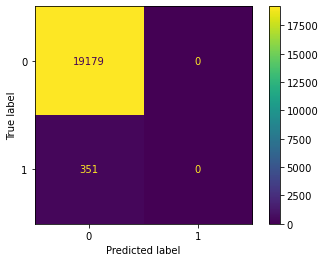

In [36]:
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

# What can we do? 

- fit the model to more balanced data 
- increase / decrease test_size 
- try a different model 
- tweak the hyper parameters on log regression 
- change the threshold for likelihood of stroke 
- forget machine learning- go back to data visualisation and inference 
- forget predictions, focus on feature importance 
- work with features - create new ones, get more data, clean the data 

## Resampling techniques 

### Random Under Sampler 

In [37]:
from imblearn.under_sampling import RandomUnderSampler

In [38]:
X_full.shape

(43400, 16)

In [41]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [42]:
rus=RandomUnderSampler()
# do we resample the TRAIN data 
# do we resample df 
# not needed - X_full_incl_y=pd.concat([X_full,y]axis=1)
X_rus,y_rus=rus.fit_resample(X_full,y)

In [43]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [44]:
y_rus.value_counts()

0    783
1    783
Name: stroke, dtype: int64

In [50]:
from imblearn.over_sampling import RandomOverSampler 

In [54]:
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X_full,y)

In [55]:
y_ros.value_counts()

0    42617
1    42617
Name: stroke, dtype: int64

### try model with rus and ros 

In [56]:
## Train Test split

X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 

classification=LogisticRegression(max_iter=500)

classification.fit(X_train_rus,y_train_rus)

y_test_pred_rus=classification.predict(X_test_rus)

accuracy_score(y_test_rus, y_test_pred_rus)

0.7673758865248227

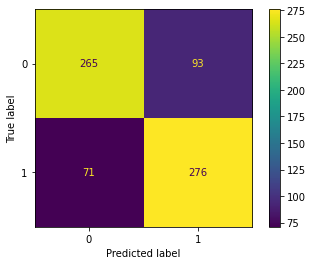

In [57]:
cm_rus=confusion_matrix(y_test_rus,y_test_pred_rus) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rus)
disp.plot();

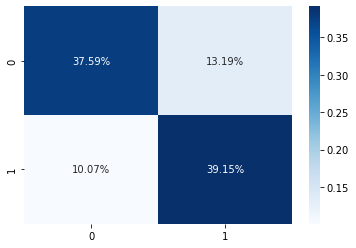

In [61]:
sns.heatmap(cm_rus/np.sum(cm_rus), annot=True, fmt='.2%',cmap='Blues');

In [58]:
## Train Test split

X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 

classification=LogisticRegression(max_iter=500)

classification.fit(X_train_ros,y_train_ros)

y_test_pred_ros=classification.predict(X_test_ros)

accuracy_score(y_test_ros, y_test_pred_ros)

0.7818072791740536

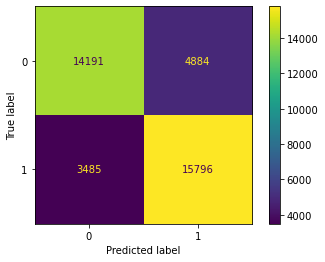

In [59]:
cm_ros=confusion_matrix(y_test_ros,y_test_pred_ros) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm_ros)
disp.plot();

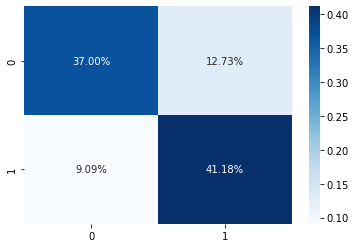

In [60]:
sns.heatmap(cm_ros/np.sum(cm_ros), annot=True, fmt='.2%',cmap='Blues');